In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [3]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
df.isnull().mean()*100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [5]:
x=df.drop(columns=['Survived'])
y=df['Survived']

In [6]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [7]:
x_train['Age_imputed']=x_train['Age']
x_test['Age_imputed']=x_test['Age']

In [8]:
x_train.head()

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0


In [9]:
x_test.tail()

,Age,Fare,Age_imputed
89,24.0,8.0500,24.0
80,22.0,9.0000,22.0
846,NaN,69.5500,NaN
870,26.0,7.8958,26.0
251,29.0,10.4625,29.0


In [10]:
x_train['Age_imputed'][x_train['Age_imputed'].isnull()]=x_train['Age'].dropna().sample(x_train['Age'].isnull().sum()).values


In [11]:
x_test['Age_imputed'][x_test['Age_imputed'].isnull()]=x_train['Age'].dropna().sample(x_test['Age'].isnull().sum()).values

In [12]:
x_train

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,36.0
493,71.0,49.5042,71.0
527,NaN,221.7792,39.0


C:\Users\Riya\AppData\Local\Temp\ipykernel_4564\3070442571.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Age'],label='Original',hist=False)
C:\Users\Riya\AppData\Local\Temp\ipykernel_4564\3070442571.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Age

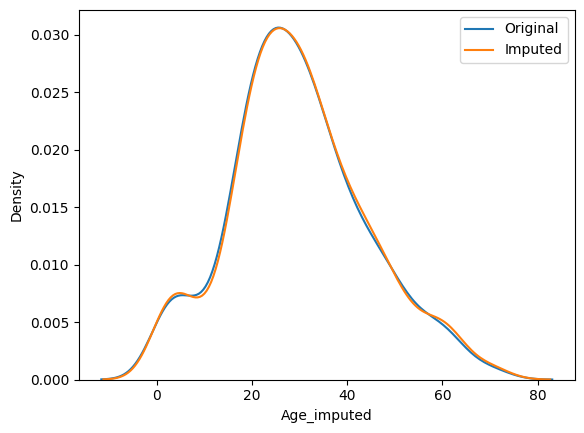

In [14]:
sns.distplot(x_train['Age'],label='Original',hist=False)
sns.distplot(x_train['Age_imputed'],label='Imputed',hist=False)
plt.legend()
plt.show()

In [15]:
#if we use linear model there is no difference in performence but if we use dicision tree there is difference in performence

In [16]:
print('original variable variance',x_train['Age'].var())
print('variable variance after imputation',x_train['Age_imputed'].var())

original variable variance 204.3495133904614
variable variance after imputation 208.41335140251869


In [18]:
x_train[['Age','Age_imputed','Fare']].cov()

,Age,Age_imputed,Fare
Age,204.349513,204.349513,71.512440
Age_imputed,204.349513,208.413351,49.178244
Fare,71.512440,49.178244,2368.246832


<AxesSubplot: >

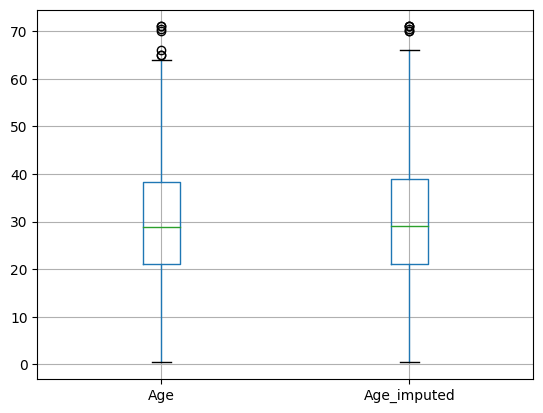

In [19]:
x_train[['Age','Age_imputed']].boxplot()

In [23]:
# sample_valued=x_train['Age'].dropna().sample(1,random_state=int(x_train['Fare']))

In [24]:
data=pd.read_csv('house-train.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])

In [25]:
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [26]:
data.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [27]:
x=data
y=data['SalePrice']

In [28]:
x_train1,x_test1,y_train1,y_test1=train_test_split(x,y,test_size=0.2,random_state=2)

In [33]:
x_train1['GarageQual_imputed']=x_train1['GarageQual']
x_test1['GarageQual_imputed']=x_test1['GarageQual']
x_train1['FireplaceQu_imputed']=x_train1['FireplaceQu']
x_test1['FireplaceQu_imputed']=x_test1['FireplaceQu']

In [34]:
x_train1

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
455,TA,TA,175500,TA,TA
863,NaN,TA,132500,TA,NaN
504,Fa,TA,147000,TA,Fa
1413,Gd,TA,257000,TA,Gd
1389,Gd,TA,131000,TA,Gd
...,...,...,...,...,...
466,Po,TA,167000,TA,Po
299,Gd,TA,158500,TA,Gd
493,Fa,TA,155000,TA,Fa
527,Gd,TA,446261,TA,Gd


In [35]:
x_train1['GarageQual_imputed'][x_train1['GarageQual_imputed'].isnull()]=x_train1['GarageQual'].dropna().sample(x_train1['GarageQual'].isnull().sum()).values
x_test1['GarageQual_imputed'][x_test1['GarageQual_imputed'].isnull()]=x_train1['GarageQual'].dropna().sample(x_test1['GarageQual'].isnull().sum()).values

x_train1['FireplaceQu_imputed'][x_train1['FireplaceQu_imputed'].isnull()]=x_train1['FireplaceQu'].dropna().sample(x_train1['FireplaceQu'].isnull().sum()).values
x_test1['FireplaceQu_imputed'][x_test1['FireplaceQu_imputed'].isnull()]=x_train1['FireplaceQu'].dropna().sample(x_test1['FireplaceQu'].isnull().sum()).values

C:\Users\Riya\AppData\Local\Temp\ipykernel_4564\3070748463.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train1['GarageQual_imputed'][x_train1['GarageQual_imputed'].isnull()]=x_train1['GarageQual'].dropna().sample(x_train1['GarageQual'].isnull().sum()).values
C:\Users\Riya\AppData\Local\Temp\ipykernel_4564\3070748463.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test1['GarageQual_imputed'][x_test1['GarageQual_imputed'].isnull()]=x_train1['GarageQual'].dropna().sample(x_test1['GarageQual'].isnull().sum()).values
C:\Users\Riya\AppData\Local\Temp\ipykernel_4564\3070748463.py:4: SettingWithCopyWarning: 
A v

In [39]:
temp=pd.concat([
    x_train1['GarageQual'].value_counts()/len(x_train1['GarageQual'].dropna()),
    x_train1['GarageQual_imputed'].value_counts()/len(x_train1['GarageQual'].dropna())
],axis=1)

temp.columns=['Original','Imputed']

In [40]:
temp

,Original,Imputed
TA,0.951043,1.008160
Fa,0.037171,0.038078
Gd,0.009973,0.010879
Po,0.000907,0.000907
Ex,0.000907,0.000907


In [41]:
temp=pd.concat([
    x_train1['FireplaceQu'].value_counts()/len(x_train1['FireplaceQu'].dropna()),
    x_train1['FireplaceQu_imputed'].value_counts()/len(x_train1['FireplaceQu'].dropna())
],axis=1)

temp.columns=['Original','Imputed']
temp

,Original,Imputed
Gd,0.494272,0.937807
TA,0.412439,0.795417
Fa,0.040917,0.076923
Po,0.027823,0.054010
Ex,0.024550,0.047463


C:\Users\Riya\AppData\Local\Temp\ipykernel_4564\108646355.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train1[x_train1['FireplaceQu']==category]['SalePrice'],hist=False,label=category)
C:\Users\Riya\AppData\Local\Temp\ipykernel_4564\108646355.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad63727

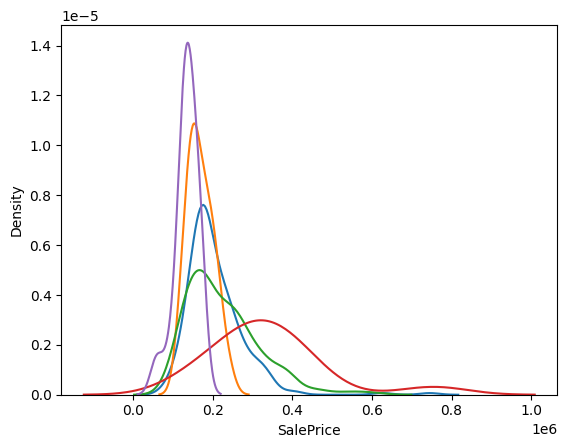

In [43]:
for category in x_train1['FireplaceQu'].dropna().unique():
    sns.distplot(x_train1[x_train1['FireplaceQu']==category]['SalePrice'],hist=False,label=category)
plt.show()

C:\Users\Riya\AppData\Local\Temp\ipykernel_4564\3291188619.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train1[x_train1['FireplaceQu_imputed']==category]['SalePrice'],hist=False,label=category)
C:\Users\Riya\AppData\Local\Temp\ipykernel_4564\3291188619.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974

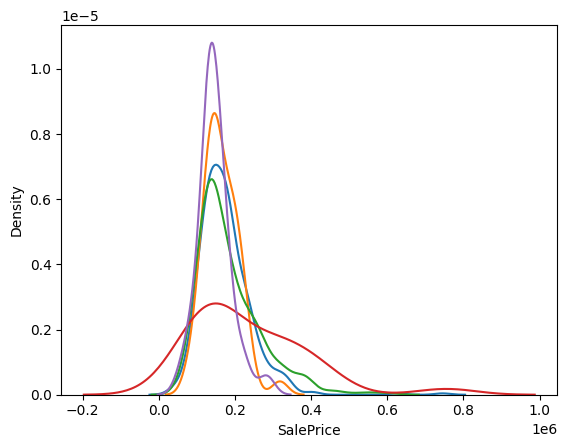

In [44]:
for category in x_train1['FireplaceQu_imputed'].dropna().unique():
    sns.distplot(x_train1[x_train1['FireplaceQu_imputed']==category]['SalePrice'],hist=False,label=category)
plt.show()